# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for the Central Limit Theorem to hold (read the introduction on Wikipedia's page about the CLT carefully: https://en.wikipedia.org/wiki/Central_limit_theorem), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    <li> Think about the way you're going to check for the normality of the distribution. Graphical methods are usually used first, but there are also other ways: https://en.wikipedia.org/wiki/Normality_test
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the Central Limit Theorem, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> First, try a bootstrap hypothesis test.
    <li> Now, let's try frequentist statistical testing. Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both frequentist tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> As in the previous example, try calculating everything using the boostrap approach, as well as the frequentist approach.
    <li> Start by computing the margin of error and confidence interval. When calculating the confidence interval, keep in mind that you should use the appropriate formula for one draw, and not N draws.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What testing approach did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [3]:
import pandas as pd

df = pd.read_csv('data/human_body_temperature.csv')

# Question 1

/Users/rvg/miniconda2/envs/tutorial/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


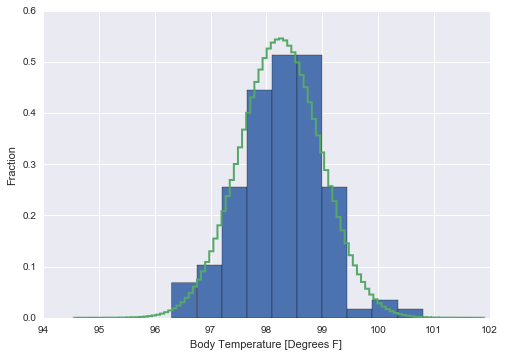

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

temp = df['temperature']
plt.hist(temp, normed=True)
plt.xlabel('Body Temperature [Degrees F]')
plt.ylabel('Fraction')
normal_points = np.random.normal(np.mean(temp), np.std(temp), 5000000)
plt.hist(normal_points, normed=True, histtype='step', bins=100, linewidth=2)
plt.show()

#### Compared to a perfect normal distribution, body temperature seems to have a bit of a negative skew and a few high-value outliers. Let's compute the skew and see if it matches our prediction

In [5]:
from scipy.stats import kurtosis, skew
print(skew(temp))

-0.00436797687908


#### Skew is negative, but only slightly less than zero, indicating a small shift away from normality. Let's create a normal probability plot so that we can visualize deviations from normality more easily.

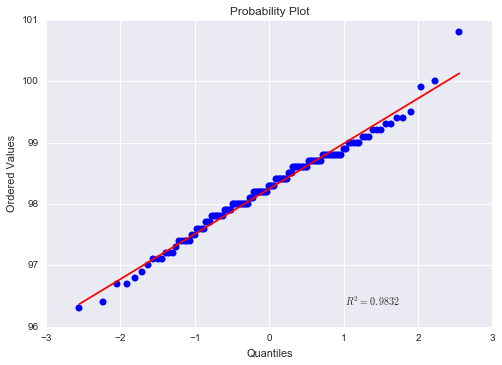

In [6]:
from scipy import stats
plt.cla()
res = stats.probplot(temp, plot=plt)
plt.show()

#### As shown, there are some outliers and the higher quantile levels, but overall body temperature is relatively consistent wiht the normal distribution

# Question 2

In [7]:
print 'Sample Size: %d'%len(temp)

Sample Size: 130


#### Since the sample size is >30, we know that this can be classified as large. And since the sample size is 130 which is much less than 10% of the population size, we can say that the observations are independent

# Question 3

In [8]:
# First we perform a bootstrap hypothesis test
np.random.seed(42)
def bs_test(data, func, size=1):
    bs_reps = np.empty(size)
    for i in range(size):
        bs_sample = np.random.choice(data, size=len(data))
        bs_rep = func(bs_sample)
        bs_reps[i] = bs_rep
    return bs_reps
bs_data = bs_test(temp, np.mean, 100000)
np.sum(bs_data >= 98.6) / float(len(bs_data))

0.0

#### From our simple bootstrap test, we can see that the likelihood of getting a value of 98.6 degrees Fahrenheit or more extreme from our data set is extremely low--not even one out of 100,000 simulations produced a mean that extreme or more

#### Now let's try using the frequentist approach. We will use a one-sample test since we are interested in testing whether our population mean is different than a constant value, i.e., 98.6, not in comparing two different population means.

#### Our sample size is >30 BUT we don't know our population standard deviation, so a t-test is more appropriate than a z-test for this particular problem. However, the data is normally distributed, so we can use a z-score

In [45]:
# Let's compute the z statistic and an associated p-value assuming the null hypothesis: that the mean normal body temperature is 98.6 degrees Fahrenheit
import statsmodels.stats.weightstats as ws
test_stat, pvalue = ws.ztest(temp, value=98.6)
print 'z-statistic: %.4f with p-value: %.9f' % (test_stat, pvalue)

4.9021570141012155e-08
z-statistic: -5.4548 with p-value: 0.000000049


#### We see that out sample mean body temperature is over 5 sample standard deviations away from 98.6 degrees Fahrenheit, and that the associated p-value is extremely small, giving strong evidence that we can reject the null hypothesis

In [47]:
# Now let's compute the t statistic and an associated p-value assuming the null hypothesis
import scipy.stats as st
test_stat, pvalue = stats.ttest_1samp(temp, popmean=98.6)
print 't-statistic: %.4f with p-value: %.9f' % (test_stat, pvalue)

2.4106320415561276e-07
t-statistic: -5.4548 with p-value: 0.000000241


#### Although we see the same value of the test statistic (they are computed in the same way), we get a larger p-value using a t-test versus a z-test. This is because the t-distribution has heavier tales, leading to higher p-values at high standard deviations, which is what we see here

# Question 4

In [21]:
# Let's draw ten samples and redo our tests
ten_samps = np.random.choice(temp, size=10)

test_stat, pvalue = ws.ztest(ten_samps, value=98.6)
print 'z-statistic: %.4f with p-value: %.9f' % (test_stat, pvalue)

test_stat, pvalue = stats.ttest_1samp(ten_samps, popmean=98.6)
print 't-statistic: %.4f with p-value: %.9f' % (test_stat, pvalue)

z-statistic: -0.3926 with p-value: 0.694638621
t-statistic: -0.3926 with p-value: 0.703773971


#### Since our sample is < 30 and we do not know our population standard deviation, a t-test is more appropriate. We see that the p-values have increased significantly and we can no longer reject the null hypothesis. Once again, the p-value is higher for the t-statistic.

# Question 5

In [30]:
# Bootstrap approach with 95% confidence interval
bs_data = bs_test(temp, np.mean, 100000)
ci = np.percentile(bs_data, [2.5, 97.5])
# Our confidence interval is 95%, which gives a z-value of 1.96
margin = 1.96 * (np.std(bs_data) / np.sqrt(len(bs_data)))
print '95 percent confidence interval between %.3f and %.3f' % (ci[0], ci[1])
print 'Margin of error: %.5f' % margin

95 percent confidence interval between 98.123 and 98.375
Margin of error: 0.00040


In [32]:
# Frequentist approach
ci = st.t.interval(0.95, len(temp)-1, loc=np.mean(temp), scale=st.sem(temp))
print '95 percent confidence interval between %.3f and %.3f' % (ci[0], ci[1])

95 percent confidence interval between 98.122 and 98.376


#### Thus, abnormal body temperatures according to this sample data set are below 98.12 and above 98.37 degrees Fahrenheit

# Question 6

/Users/rvg/miniconda2/envs/tutorial/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/rvg/miniconda2/envs/tutorial/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))
/Users/rvg/miniconda2/envs/tutorial/lib/python2.7/site-packages/scipy/stats/stats.py:1565: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


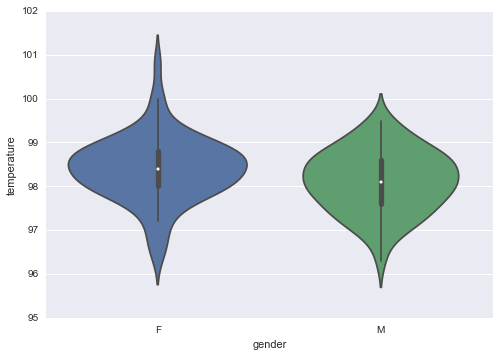

In [9]:
# First let's do some EDA
sns.violinplot(x='gender', y='temperature', data=df)

In [10]:
male = df[df['gender'] == 'M']['temperature']
female = df[df['gender'] == 'F']['temperature']
print np.mean(male), np.mean(female)

98.10461538461537 98.39384615384614


#### Although there's a larger spread in female body temperatures, the means look rather similar, and indeed they're only ~.3 degrees difference between the two populations

#### Since we are trying to see if there is a difference between two sample populations,  our sample sizes are both >30 and we don't know the population standard deviation, we can use a two-sample bootstrapping test to test if there is a significant difference.

#### Here our null hypothesis is that there is no difference between the mean temperature between males and females. Let's shift both data sets to the same mean, bootstrap the results, calculate a simulated difference between the means of the populations and see the fraction of times that simulated difference is as extreme as the observed difference, i.e., calculate the p-value.

In [11]:
mean_temp = np.mean(df['temperature'])
# shift both populations to the same mean
m_temp_shift = male - np.mean(male) + mean_temp
f_temp_shift = female - np.mean(female) + mean_temp
# now let's simulate computing the mean for both of these mean-shifted samples 100,000 times
bs_rep_m = bs_test(m_temp_shift, np.mean, 100000)
bs_rep_f = bs_test(f_temp_shift, np.mean, 100000)
# calculate the difference in the bootstrap replicant mean
bs_difference = bs_rep_f - bs_rep_m
# compute the actual observed difference
obs_difference = np.mean(female) - np.mean(male)
# let's see the fraction times our simulated mean differences are as extreme as the actual difference--compute the pvalue
p_val = np.sum(bs_difference >= obs_difference) / float(len(bs_difference))
print 'p-value = %.5f' % p_val

p-value = 0.01077


#### We get a p-value of .01, indicating that we can reject the null hypothesis IF we set our alpha to above .01. Since this is a rather high alpha, it's not completely clear that there is a significant difference between male and female body temperatures.

## Conclusion:

#### We show in this notebook that the mean normal body temperature of this data sample is inconsistent with the historical value of 98.6 degrees Fahrenheit through a combination of frequentist and bootstrap statistics. p-values less than 10^-7 provide strong evidence that we can reject the null hypothesis: that the mean normal body temperature is 98.6 degrees Fahrenheit

#### Additionally, we show using bootstrap statistics that there is possibly a significant difference in the mean normal body temperature between males and females depending on your choice for alpha.